# Image Processing with Python

The goal of computer vision is to understand the story unfolding in a picture. As humans, this is quite simple. But for computers, the task is extremely difficult. Computer vision is now prevalent in many areas of your life, whether your realize it or not. We apply computer algorithms to analyze movies, football games, hand gesture recognition (for sign language), license plates, medicine, surgery, military, retail and many science fields, including astronomy. We even use computer vision in space. NASA's Mars Rover includes capabilities to model the terrain of the planet, detect obstacles in its paths, and stitch together panoramic images.

## Contents

- [Loading, Displaying and Saving](#loading)
- [Image Basics](#image_basics)
- [Drawing](#drawing)
- [Image Processing](#image_processing)
- [Histograms](#histograms)
- [Smoothing and Blurring](#blurring)
- [Thresholding](#thresholding)
- [Gradients and Edge Detection](#edge_detection)
- [Contours](#contours)

## Required packages

In order to explore the world of computer vision, we need to install some packages and libraries. The list of required packages are:

- Numpy
- Matplotlib
- Scipy
- OpenCV

To install these packages in your Conda environment you can run the following command:
`conda install numpy matplotlb scipy opencv`

Note that OpenCV does not support Python 3.9 yet, so make sure you have a MiniConda (or Anaconda) installation with Python 3.8.

## Loading, Displaying, and Saving

<a id='loading'></a>

In order to load an image, we need to know it's location on the hard drive. We can use two types of paths:
- Absolute paths: These paths are relative to the root of filesystem you are using. For example, an image `my_image.jpg` stored on the Desktop on Windows would have a path similar to `C:\Users\username\Desktop\my_image.jpg`. On a UNIX-like system such as OS X or Ubuntu, it would be something like `/home/username/Desktop/my_image.jpg`
- Relative Paths: These paths are relative to the directory from where you script is running. Rememeber that filesystem generally are structued as trees, with higher level nodes called parents and lower-level nodes called children. If your script is running from the Desktop and your image is also located on the Desktop, then the relative path is simply `.`, meaning this directory, such that the full relative path would be `.\my_image.png`. If your image is in a directory on the Desktop calledn `images` and you are still running as the script from the Desktop, then the relative paths would be `.\images\my_image.png`. The parent of a directory is referred to as `..`.
If the above confuses you, you can always simply place the images (or any other files) in the same directory as your script and load them using just their name (the `.\` will be added automatically). 

We'll start off by importing the OpenCV package:

In [1]:
import cv2

We'll use the imported `cv2` module to load an image:

In [7]:
image = cv2.imread("img/andromeda_galaxy.jpg")

The image has now been loaded and saved in the variable `image`. Now we can start exploring the image, starting with examining its dimensions. Images are represented as NumPy arrays, so to determine the size we can simply use the `shape` attribute to examine the width, height and the number of channels. You'll note that the image has a width of 1280 pixels, a height of 864 pixels, and 3 channels (the RGB components of the image). Represented as a NumPy array, our image has a shape of (864, 1280, 3). The NumPy shape may seem reversed to you (specifying the height before the width), but in terms of a *matrix definition*, it actually makes sense. When we define matrices, it is common to write them in the form (*# of rows x # of columns*). Here, our image has a *height* of 864 pixels (the number of *rows*) and a *width* of 1280 pixels (the number of *columns*) - thus, the NumPy shape makes sense (alhtough it may seems a bit confusing at first).

In [8]:
width = image.shape[1]
height = image.shape[0]
channels = image.shape[2]

print(f"The image has a width of {width} pixels, height of {height} pixels, and {channels} channels")

The image has a width of 1280 pixels, height of 864 pixels, and 3 channels


We can also display the image to screen. We can use OpenCV to display the image, in which case the code would look like the below. However, this does not work well within Jupyter, so we'll be using matplotlib instead. We will need to change the channel order first, since OpenCV stores the order differently to how matplotlib expects them, this will be discussed further later on.

In [4]:
# cv2.imshow("Image", image)
# cv2.waitKey(0)

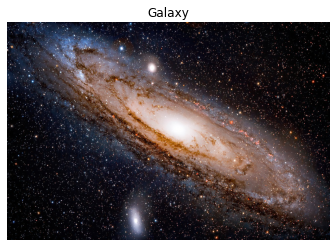

In [9]:
import matplotlib.pyplot as plt

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Galaxy")
plt.axis('off')  # Remove axes, as we don't need them
plt.show()

Since we need 4 lines of code to show an image, we are going to create a helper function:

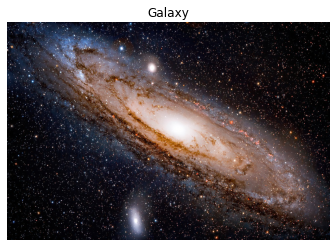

In [11]:
def display(image, title=""):
    plt.figure()
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()
    
# To call
display(image, "Galaxy")

Finally, we are going to write our image to disk in JPG format. All we are doing here is providing the path to the file (the first argument) and then the image we want to save (the second argument).

In [13]:
cv2.imwrite("new_image.jpg", image)

True

## Image Basics

<a id='image_basics'></a>

### Pixels

Every image consists of a set of pixels. Pixels are the raw building blocks of an image. There is no finer granularity than the pixel. Normally, we think of a pixel as the "color" or the "intensity" of light that appears in a given place in our image. For example, let's pretend we have an image with a resolution 500 x 300. This means that our image is represented a a grid of pixels, with 500 rows and 300 columns. Overall, there are 500 x 300 = 150,000 pixels in our image. 

Most pixels are represented in two ways: grayscale and color. In a grayscale image, each pixel has a value between 0 and 255, where zero corresponds to "black" and 255 corresponds to "white". The values in between 0 and 255 are varying shades of gray, where values closer to 0 are darker and values closer to 255 are lighter.

Color pixels are normally represented in the RGB color space - one value for the Red component, one for the Green, and one for the Blue. Other color spaces exist, but we'll concentrate on RGB.Each of the three color is reprensented by an integer in the range 0 to 255, which indicates how "much" of the color there is. Given that the pixel value only needs to be in the range [0, 255], we normally use an 8-bit unsigned integer to represent each color intensity. We then combine these values into an RGB tuple in the form `(red, green, blue)`. This tuple represents our color.

To construct white color, we would fill up each of the red, green, and blue buckets completely, like so: `(255, 255, 255)`. To create black color, we would empty each of the buckets: `(0, 0, 0)`. To create a pure red color, we would only fill up the red bucket completely: `(255, 0, 0`). For your reference, here are some common color represented as RGB tuples:
- **Black**: `(0, 0, 0`)
- **White**: `(255, 255, 255`)
- **Red**: `(255, 0, 0`)
- **Green**: `(0, 255, 0`)
- **Blue**: `(0, 0, 255`)
- **Aqua**: `(0, 255, 255`)
- **Fuchsia**: `(255, 0, 255`)
- **Maroon**: `(128, 0, 0`)
- **Olive**: `(128, 128, 0`)
- **Purple**: `(128, 0, 128`)
- **Teal**: `(0, 128, 128`)
- **Yellow**: `(255, 255, 0`)

### Overview of the Coordinate System

We said that an image is represented as a grid of pixels. Image the grid as a piece of paper. Using this graph paper, the point (0, 0) corresponds to the upper left corner of the image. As we move down and to the right, both the *x* and *y* values increase. Have a look at the image below

<img src="img/image_coordinates.png">

Here we have a letter "I" on a piece of graph paper. We see that we have an 8 x 8 grid with a total of 64 pixels. The point (0, 0) corresponds to the top left pixel in our image, whereas the point (7, 7) corresponds to the bottom right corner. Finally, the point (3, 4) is the pixel three columns to the rights and four rows down, once again keeping in mind that we start counting from *zero*. 

### Accessing and manipulating pixels

Remeber, OpenCV represents images as NumPy arrays. In order to access a pixel value, we just need to supply the *x* and *y* coordinates of the pixels we are interested in. From there, we are given a tuple representing the Red, Green and Blue componenets of the image.

However, it is important to note that OpenCV stored RGB channels in *reverese order*. While we normally think in terms of Red, Green and Blue, OpenCV actually stores them in the order of Blue, Green and Red. This is **important to note** since it could cause some confusion later. Wit that in mind, let's start manipulating pixels:

In [14]:
# Load the image
image = cv2.imread("img/andromeda_galaxy.jpg")

# Read pixel value
(b, g, r) = image[0, 0]
print(f"Pixel at (0, 0) - Red: {r}, Green: {g}, Blue: {b}")

# Write pixel value
image[0, 0] = (0, 0, 255)
(b, g, r) = image[0, 0]
print(f"Pixel at (0, 0) - Red: {r}, Green: {g}, Blue: {b}")

Pixel at (0, 0) - Red: 3, Green: 5, Blue: 17
Pixel at (0, 0) - Red: 255, Green: 0, Blue: 0


In the code above, after loading the image, we grab the pixel located at (0, 0) - the top-left corner of the image. This pixel is represented as a tuple. Again, OpenCV stored RGB in reverse order, so when we unpack and access each element in the tuple, we are actually viewing them in BGR order. In the second part of the example, we manipulate the top-left pixel in the image and set it to have a value of `(0, 0, 255)`, and then read it back again and print out the value.

Accessing and setting a pixel value is simple enough, but what if we wanted to use NumPy's array slicing capabilities to access larger rectangular portions of the image? The code below demonstrates how we can do this:

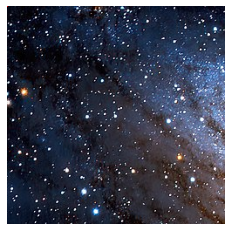

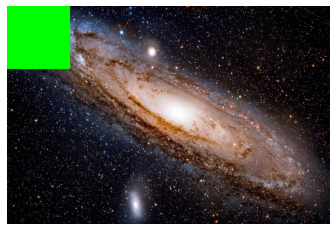

In [15]:
# Access corner from image and display it
corner = image[0:250, 0:250]
display(corner)

# Modify corner in image and display entire image
image[0:250, 0:250] = (0, 255, 0)
display(image)


In the above example we grab a 250 x 250 pixel region of the image. In fact, this is the top-left corner of the image. In order to grab chunks of an image, NumPy expects that we provide four indexes:
- **Start y**: The first value is the starting *y* coordinate. This is where our array slice will start along the y-axis. In our example above, our slice starts at *y = 0*
- **End x**: Just as we supplied a starting *y* value, we must provide an ending *y* value. Our slice stops along the y-axis when *y* = 250
- **Start x**: The third value we must supply is the starting *x* coordinate for the slice. In order to grab the top-left region of the imafe, we start at *x* = 0
- **End x**: Finally, we need to provide an x-axis value for our slice to stop. We stop when *x* = 100
Once we have extracted the top-left corner of the image we show the result of the cropping. 

In the second part of the example we use array slices to change the color of a region of pixels. We are again accessing the top-left corder of the image, however, this time we are setting this region to have a value of `(0, 255, 0)` (green). 

## Drawing

<a id='drawing'></a>

OpenCV provides convenient, easy-to-use methods to draw shapes on an image. Here we'll review the three most basic methods to draw shapes: `cv2.line`, `cv2.rectangle` and `cv2.circle`. 

Before drawing anything, we must first define our canvas in which we'll draw our masterpieces. Up until this point we have only loaded images from disk. However, we can also define our images manually using NumPy arrays. Given that OpenCV interprets an image as a NumPy array, there is nore reason why we can't manually define the image ourselves. In order to initialise our image, we can do the following:

In [16]:
import numpy as np

canvas = np.zeros((300, 300, 3), dtype="uint8")

We construct a NumPy array using the `np.zeros` function with 300 rows and 300 columns, yielding a 300 x 300 pixel image. We also alocate space for 3 channels - one for Red, Green and Blue respectively. It's important to draw your attention to the second argument of the `np.zeros` function: the data type, `dtype`. Since we are representing our image as an RGB image with pixels in the range [0, 255], it's important that we use an 8-bit unsigned integer, or `uint8`. There are many other data types that we can use (common ones include 32-bit integers, and 32-bit or 64-bit floats), but we'll mainly be using `uint8` here.

Now that we have our canvas initialised, we can do some drawing:

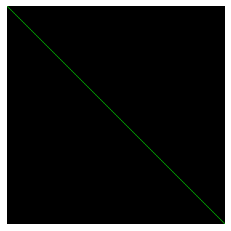

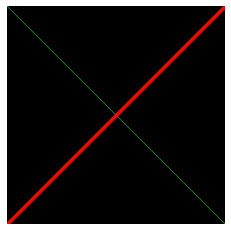

In [17]:
# Define the color green
green = (0, 255, 0)

# Draw a line and show
cv2.line(canvas, (0, 0), (300, 300), green)
display(canvas)

# Define the color green
red = (0, 0, 255)

# Define another line and show
cv2.line(canvas, (300, 0), (0, 300), red, 3)
display(canvas)

The first thing we do is define a tuple to represent the color "green". Then, we draw a green line from point (0, 0), the top-left corner of the image, to point (300, 300), the bottom-right corner of the image. In order to draw the line, we make use of the `cv2.line` function. The first argument to this method is the image we are going to draw on. In this case, it's our `canvas`. The second argument is the starting point of the line. We choose point (0, 0). We also need to supply an ending point for the line (the third argument). We define our ending point to be (300, 300), the bottom-right corner of the image. The last argument is the color of our line, which in this case is green. Finally, we display the image.

As you can see, drawing a line is quite simple. However, there is one other important argument to consider in the `cv2.line` method: the thickness. In the second part of the example we draw a line which is perpendicular to the first one. The last parameter controls the thickness of the line, in this case the thickness is set to 3 pixels. 

Now we can move on to drawing rectangles. Check out the code below. We use the `cv2.rectangle` function to draw rectangles. The signature of this function is identical to the `cv2.line` function above, the difference being that instead of drawing a line between the two points, the function draws a rectangle. Well, the outline of a rectangle. If you want the rectangle to be "filled in", the value of the thickness aregument should be negative, as in the last example below.

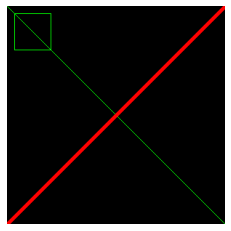

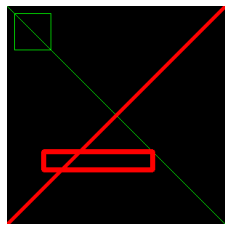

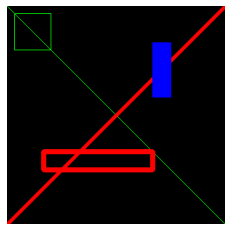

In [18]:
# Draw rectangle and show image
cv2.rectangle(canvas, (10, 10), (60, 60), green)

plt.imshow(cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Draw rectangle and show image
cv2.rectangle(canvas, (50, 200), (200, 225), red, 5)
display(canvas)

# Define the color blue
blue = (255, 0, 0)

# Draw rectangle and show image
cv2.rectangle(canvas, (200, 50), (225, 125), blue, -1)
display(canvas)

Drawing cirlces is just as simple, but the function arguments are a little different. In the example below, we start off by re-initialing our canvas to be blank. We then calculate the center of the image (which is the height and width divided by 2), and move on to define the color white. Then we draw our circles. We loop over a number of radius valies, starting from 0 and ending at 150 (since the `range` function is *exclusive*), incrementing by 25 at each step. The first argument of the `cv2.circle` is our `canvas`, the image we want to draw the circle on. We then supply the points in which our circle will be drawn around. We pass in the tuple `(center_x, center_y)` so that our cirlces will be centered at the middle of the image. The third argument is the radius of the circle we wish to draw. Finally, we pass in the color of our circle

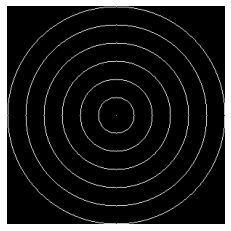

In [19]:
# Define a new empty canvas
canvas = np.zeros((300, 300, 3), dtype = "uint8")

# Calculate the center of the canvas
(center_x, center_y) = (canvas.shape[1] // 2, canvas.shape[0] // 2)

# Define the color white
white = (255, 255, 255)

for r in range(0, 175, 25):
    cv2.circle(canvas, (center_x, center_y), r, white)
    
# Show the image
display(canvas)

That's all there is to drawing basic objects with OpenCV! Let's finish off with an abstract drawing. Try to figure out what the code is doing.

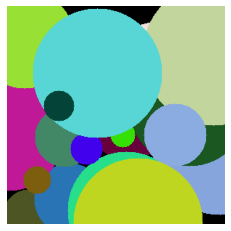

In [20]:
canvas = np.zeros((300, 300, 3), dtype = "uint8")

for i in range(0, 25):
    radius = np.random.randint(5, high=100)
    color = np.random.randint(0, high=256, size=(3,)).tolist()
    pt = np.random.randint(0, high=300, size=(2,))
    cv2.circle(canvas, tuple(pt), radius, color, -1)
    
# Show the image
display(canvas)

## Image Processing

<a id='image_processing'></a>

Now that we have a solid foundation to build upon, we start exploring simple image processing techniques.

### Image Tranformations

#### Translation

The first method we are going to explire is translation. Translation is the shifting of an image along the *x* and *y* axis. Using translation, we can shift an image up, down, left, or right, along with any combination of the above. The concept is better explained through some code:

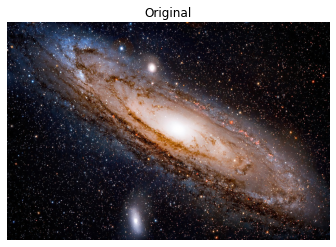

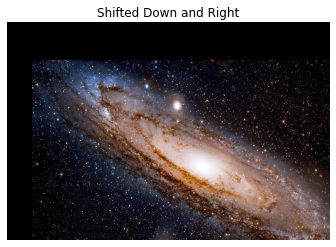

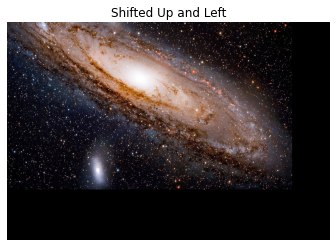

In [21]:
# Load the image
image = cv2.imread("img/andromeda_galaxy.jpg")

display(image, "Original")

# Apply transformation
M = np.float32([[1, 0, 100], [0, 1, 150]])
shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))

display(shifted, "Shifted Down and Right")
                         
# Make another transformation
M = np.float32([[1, 0, -150],  [0, 1, -200]])
shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
                         
display(shifted, "Shifted Up and Left")

We start off by loading our image, and then perform our first translation. To do this, we first define out translation matrix `M`. This matrix tells us how many pixels to the left or right, and up or down, the image will be shifted. Our translation matrix `M` is defined as a floating point array - this is important because OpenCV expect this matrix to be a floating point type. The first row of the Matrix is [1, 0, $t_x$], where $t_x$ is the number of pixels we will shift the image left or right. Negative values of $t_x$ will shift the image to the left and positive values will shift the image to the right. Then, we define the second row of the matrix as [0, 1, $t_y$], where $t_y$ is the number of pixels we will shift the image up or down. Negative values of $t_y$ will shift the image up and positive values will shift the image down. Using this notation, the first translation shift the image bt $t_x$ = 100 (100 pixels right) and $t_y$ = 150 (150 pixels down). 

Now that we have our translation matrix define, the actual translation is performed using the `cv2.warpAffine` function. The first argument is the image we wish to ship, and the second argument is our translation matrix `M`. Finally, we manually supply the dimensions (width and height) if our image as the third argument. The second translation follow the same process, with $t_x$ = -100 (100 pixels left) and $t_y$ = 150 (150 pixels up).

Performing this translation manually takes a fair bit of code (and is not pretty to look at), so we can define a helper function for it:

In [22]:
# Create translation helper function
def translate(image, x, y):
    M = np.float32([[1, 0, x], [0, 1, y]])
    shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
    return shifted

# Call the fuction like so
shifted = translate(image, 100, 150)

#### Rotation

Rotation is exactly what it sounds like: rotating an image by some angle $\theta$. We'll use $\theta$ to represent by how many degrees we are rotating the image:

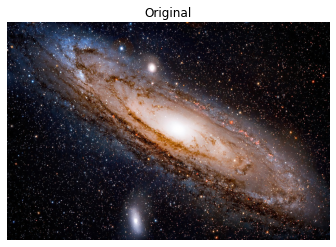

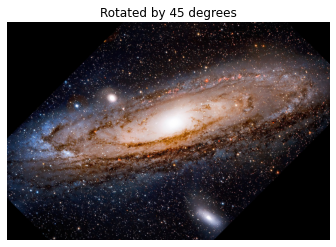

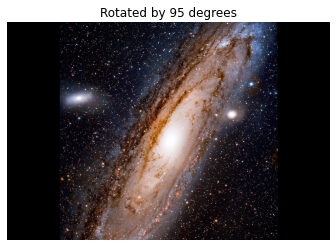

In [23]:
# Load the image
image = cv2.imread("img/andromeda_galaxy.jpg")

# Show the image
display(image, "Original")

# Calculate center of image
(h, w) = image.shape[:2]
center = (w //2 , h // 2)

# First rotation
M = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))

display(rotated, "Rotated by 45 degrees")

# Second rotation
M = cv2.getRotationMatrix2D(center, -90, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))

display(rotated, "Rotated by 95 degrees")


When we roate an image, we need to specify around which points we want to rotate, In most cases we will want to rotate around the *center* of an image, however OpenCV allows you to specify any arbitrary point you want to rotate around. To calculate the center point of the image, we grab the width and heigh of the image and divide each by 2. 

Just as we define a matrix to translate an image, we also define a matrix to rotate the image. Instead of manually constructing the matrix using NumPy, we'll just make a call to the `cv2.getRotationMatrix2D` function, which takes three arguments: the point at which we want to rotate the image, $\theta$, which is the number of degrees we are going to rotate the image by, and the scale of the image. We haven't discussed resizing yet, but here you can specify a floating point value, where 1.0 means the same dimensions of the image are used. Once we have our rotation matrix `M` from the `cv2.getRotationMatrix2D` function, we can apply the rotation to our image using the `cv2.warpAffine` function as we were doing for translation.

We can define a helper function as we did for translation:

In [27]:
# Create rotation helper function
def rotate(image, angle, center=None, scale=1.0):
    (h, w) = image.shape[:2]
    
    if center is None:
        center = (w // 2, h // 2)
        
    M = cv2.getRotationMatrix2D(center, angle, scale)
    rotated = cv2.warpAffine(image, M, (w, h))
    return rotated

# Call the function like so
rotated = rotate(image, 90)

#### Resizing

Next up we are going to explore how to resize an image. We'll be using the `cv2.resze` function to resize our images. We need to keep in mind the aspect ratio when using this function. Let's start off with an example:

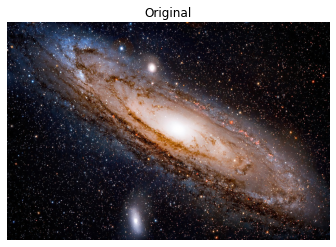

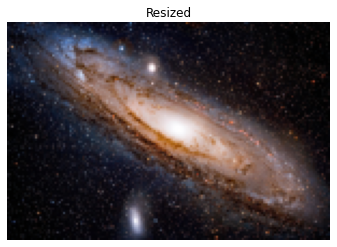

In [28]:
from matplotlib import pyplot as plt
import cv2

# Load the image
image = cv2.imread("img/andromeda_galaxy.jpg")

display(image, "Original")

# Define new size
r = 150 / image.shape[1]
dim = (150, int(image.shape[0] * r))

# Resize image
resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)

display(resized, "Resized")

Before resizing we compute the aspect ration. We define our new image width to be 150 pixels. In order to compute the ratio of the new height to the old height, we simply define our ratin `r` to be the new width (150 pixels) divided by the old width, which we access using `image.shape[1]`. Now that we have our ratio, we compute the new dimensions of the image. Again, the width of the image will be 150 pixels. The height is then computed by multiplying the old height by our ratio and converting to an integer.

The actual resizing of the image is performed by the `cv2.resize` function call. The first argument is the image we wish to resize, and the second argument is our computed dimensions for the new image. The last parameter is our `interpolation` method, which is the algorithm behind the scenes to handle how the actual image is resized. In general, `cv2.INTER_AREA` obtains the best results when resizing; however, other appropriate choices include `cv2.INTER_LINEAR`, `cv2.INTER_CUBIC` and `cv2.INTER_NEAREST`.

In the example above, we only resized the image by specifying the width. We can also do so by specifying the height:

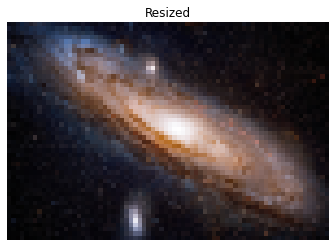

In [29]:
# Define the new size
r = 50.0 / image.shape[0]
dim = (int(image.shape[1] * r), 50)

# Resize the image
resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)

display(resized, "Resized")

The helper function for resizing and image would look like the below:

In [30]:
def resize(image, width=None, height=None, inter=cv2.INTER_AREA):
    dim = None
    (h, w) = image.shape[:2]
    
    if width is None and height is None:
        return image
    
    if width is None:
        r = height / float(h)
        dim = (int(w * r), height)
    else:
        r = width / float(w)
        dim = (width, int(h * r))
        
    resized = cv2.resize(image, dim, interpolation=inter)
    return resized

# To call it:
resized = resize(image, width=150)
resized = resize(image, height=200)

#### Flipping

Next up is flipping an image. We can flip an image around either the *x* or *y* axis, or both. The code example below demonstrates the result of flipping an image:

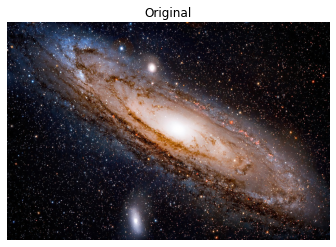

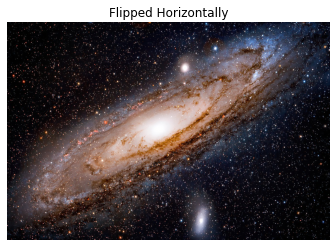

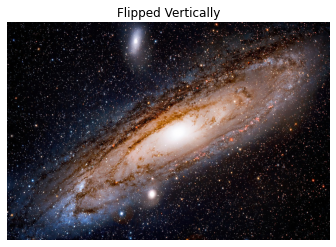

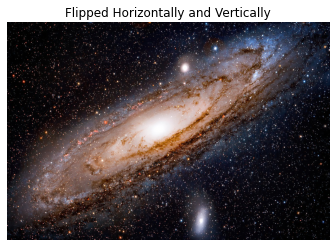

In [31]:
# Load the image
image = cv2.imread("img/andromeda_galaxy.jpg")

display(image, "Original")

# Flip horizontally
flipped = cv2.flip(image, 1)

display(flipped, "Flipped Horizontally")

# Flip vertically
flipped = cv2.flip(image, 0)

display(flipped, "Flipped Vertically")

# Flip horizontally and vertically
flipped = cv2.flip(image, 2)

display(flipped, "Flipped Horizontally and Vertically")

Flipped an image is accomplished by calling `cv2.flip`. This function requires two arguments: the image we want to flip and a flip code that is used to determine how we are going to flip the image. Using a flip code of 1 indicates that we are going to flip the image horizontally, along the y-axis. A flip code of 0 flips vertically, along the x-axis. A flip code of 2 flips in both directions.

#### Cropping

When we crop an image, we want to remove the outer parts of the image that we are not interested in. We can accomplish cropping by using NumPy array slicing, as we have seen before:

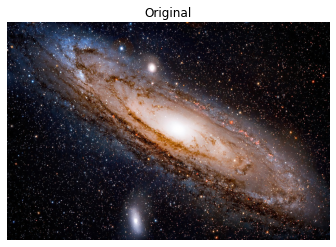

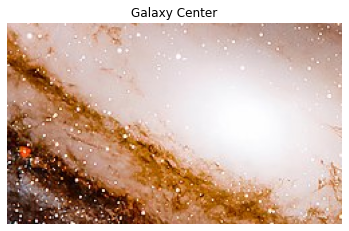

In [32]:
# Load the image
image = cv2.imread("img/andromeda_galaxy.jpg")

display(image, "Original")

# Crop the galaxy's center
cropped = image[350:500, 500:750]

display(cropped, "Galaxy Center")

### Image Arithmetic

We all know the basic arithmetic operations like addition and subtraction, but when working with images, we need to keep in mind the limits of the color space and data type. For example, RGB images have pixels that fall within the range [0, 255]. So what happens if we are examining a pixels with intensity and we try to add 10 to it?

Under normal arithmetic rues, we would end up with a value of 260. However, since RGB images are represented as 8-bit unsigned integers, 260 is not a valid value. So, what should happen? Should we perform a check of some sort to ensure no pixels falls outside the range of [0, 255], this clipping all pixels to have a minimum value of 0 and a maximum vaue of 255? Or do we apply a modulus operator, and "wrap around"? Under modulus rules, adding 10 to 250 would simply wrap around to a value of 4.

There is no correct way, it depends on how you are manipulating your pixels and what you want the desired results to be. However, be sure to keep in mind that there are differences between OpenCV and NumPy addition. NumPy will perform modulo arithmetic and "wrap around". OpenCV, on the other hand, will perform clipping and ensure pixel values never fall outside the acceptable range.

Let's see what happens when we perform some arithemtic on our image:

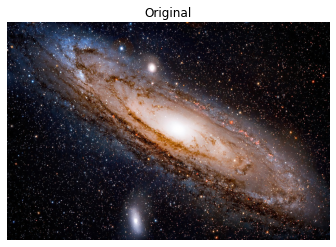

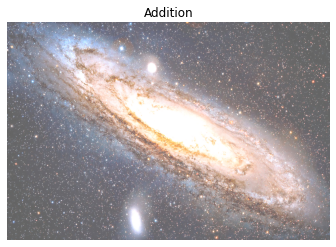

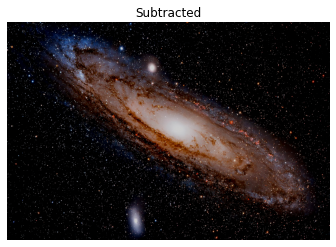

In [33]:
import numpy as np

# Load the image
image = cv2.imread("img/andromeda_galaxy.jpg")

display(image, "Original")

# Addition
M = np.ones(image.shape, dtype="uint8") * 100
added = cv2.add(image, M)

display(added, "Addition")

# Subtraction
M[:] = 50
subtracted = cv2.subtract(image, M)

display(subtracted, "Subtracted")

### Bitwise Operations

We will review four bitwise operations: AND, OR, XOR and NOT. These operations are paramount to image processing, especially when we start working with masks. Bitwise operations operate in a binary manner and are represented as grayscale images. A given pixel is turned "off" if it has a value of zero, and is turned "on" if the pixel has a value greater than zero.

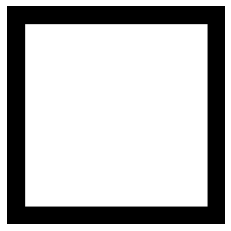

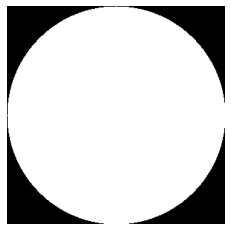

In [34]:
rectangle = np.zeros((300, 300), dtype=np.uint8)
cv2.rectangle(rectangle, (25, 25), (275, 275), 255, -1)
display(rectangle)

circle = np.zeros((300, 300), dtype=np.uint8)
cv2.circle(circle, (150, 150), 150, 255, -1)
display(circle)

In the code above, we initialise a rectangle image as a 300 x 300 NumPy array, then draw a 250 x 250 white rectangle at the center of the image. Similarly, we initialize another image to contain our cirlce, which is placed at the center of a canvas with a radius of 150 pixels. We will use these shapes to demonstrate our bitwise operations:

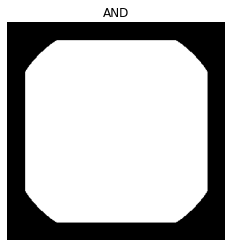

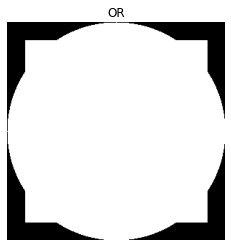

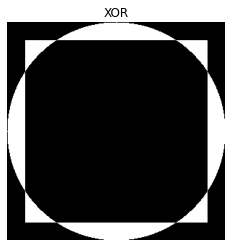

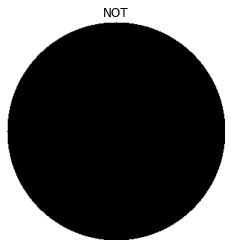

In [35]:
bitwise_and = cv2.bitwise_and(rectangle, circle)
display(bitwise_and, "AND")

bitwise_or = cv2.bitwise_or(rectangle, circle)
display(bitwise_or, "OR")

bitwise_xor = cv2.bitwise_xor(rectangle, circle)
display(bitwise_xor, "XOR")

bitwise_not = cv2.bitwise_not(circle)
display(bitwise_not, "NOT")

In order to utilize bitwise functions, we assume (in most cases) that we are comparing two pixels (the only exception is the NOT function). We'll compare each pixel and then construct our bitwise representation. Let's quickly review our binary operations:
- AND: True if and only if both pixels are greater than zero
- OR: True if either of the two pixels are greater than zero
- XOR: True if and only if *either* of the two pixels are greater than zero, but not both
- NOT: Inverts the "on" and "off" pixels in an image

In the code above we apply all these operations on our rectangle and square. For the AND operation, we can see that edges of our square are lost - this makes sense because our rectangle does not cover as large an area as the circle, and thus both pixels are not "on". For the OR operatins, the rectangle and circle are combined together. For the XOR operations, we see that the center of the square has been removed. For the NOT case, the pixels have been flipped, switching our white circle to a black circle

### Masking

Now we are ready to explore masking, and exteremly powerful and useful technique in computer vision and image processing. Using a mask allows us to focus only on the portions of the image that interests us. For example, let's say that we are building a computer vision system to recognize faces. The only part of the image we are interested in finding and describing are the parts of the image that contain faces - we simply don't care about the rest of the content of the image. Provided that we could find faces in the image, we might construct a mask to show *only* faces in the image.

Let's make this a little more concrete. In the code below we load the image of the Andromeda galaxy we've been using, howeber, in this case, we are not interested in the Andromeda galaxy itself, but in one of it's satellite galaxies, M110, which is below and to the left of it. We could apply a cropping to extract that region of the image, or, we could apply a mask to the image. We generate a rectangular mask and apply it to our image

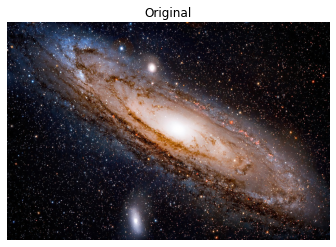

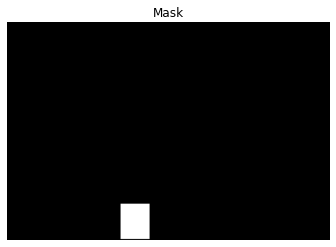

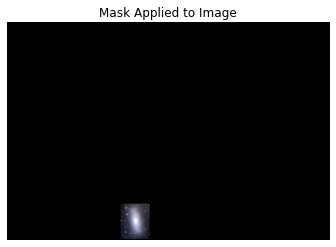

In [36]:
image = cv2.imread("img/andromeda_galaxy.jpg")
display(image, "Original")

mask = np.zeros(image.shape[:2], dtype=np.uint8)
mask[720:860, 450:565] = 255
display(mask, "Mask")

masked = cv2.bitwise_and(image, image, mask=mask)
display(masked, "Mask Applied to Image")

We use the `cv2.bitwise_and` function to apply masks. Thee first two parameters are the image itself. Obviously, the AND function will be `True` for all pixels in the image; however, the important part of this function is the `mask` keyword. By supplying a mask, the `cv2.bitwise_and` function only examines pixels that are "on" in the mask. In this case, only pixels that are part of the white rectangle. Look at another example, which centers on the nucleus of the Andromeda galaxy:

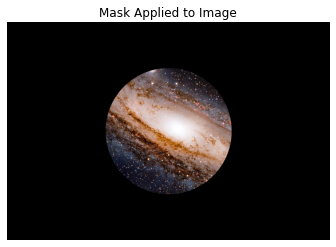

In [37]:
mask = np.zeros(image.shape[:2], dtype=np.uint8)
c_x, c_y = (image.shape[1] // 2, image.shape[0] // 2)
cv2.circle(mask, (c_x, c_y), 250, 255, -1)
masked = cv2.bitwise_and(image, image, mask=mask)
display(masked, "Mask Applied to Image")

Right now masking may not seem very interesting, but we'll return to it once we start computing histograms.

### Splitting and Merging Channels

A color image consists of multiple channels: a Red, a Green and a Blue component. We have seen that we can access these components via indexing into NumPy arrays. But what if we wanted to split an image into its respective components? We can use the `cv2.slit` function for that. Before we do so, let's load animage of the sun image and see what each individual channels looks like

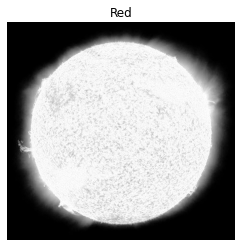

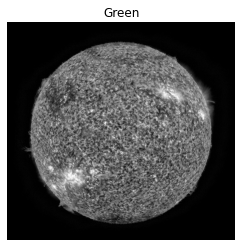

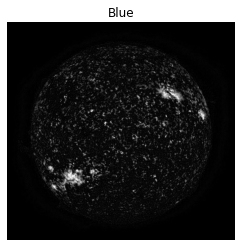

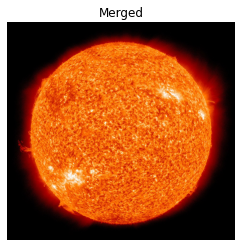

In [38]:
image = cv2.imread("img/sun.jpg")


B, G, R = cv2.split(image)
display(R, "Red")
display(G, "Green")
display(B, "Blue")

merged = cv2.merge([B, G, R])
display(image, "Merged")

The Blue channel is very dark. This makes sense, because the sun has very few blue colors in it, while the Red channel is extremely light, and near pure white in some locations. This is beacuse shades of red are heavily represented in our image. Remember that OpenCV stored the images in BGR order. 

We can also merge channels back together using the `cv2.merge` function. We simply specify our channels, in BGR order, and then `cv2.merge` takes care of the rest. 

An alternative method to visualize the channels of an image can be seen below. In order to show the actual "colour" of the channel, we first need to take apart the image using `cv2.split`. Then, we need to re-construct the image, but this time setting all pixels but the current channel as zero.

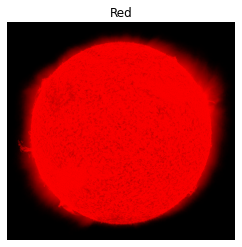

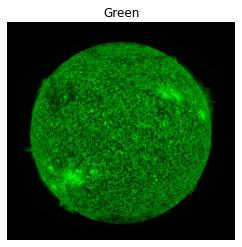

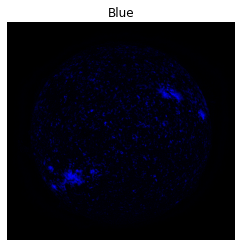

In [39]:
zeros = np.zeros(image.shape[:2], dtype=np.uint8)
display(cv2.merge([zeros, zeros, R]), "Red")
display(cv2.merge([zeros, G, zeros]), "Green")
display(cv2.merge([B, zeros, zeros]), "Blue")

## Histograms

<a id='histograms'></a>

A histogram represents the distribution of pixels intensities (whether color or grayscale) in an image. It can be visualised as a graph that gives a high-level intuition of the intensity (pixel value) distribution. Remember that the range for RGB images is [0, 255].

When plottng histograms, the X-axis serves as our "bins". If we construct a historgram with 256 bins, then we are effectively counting the number of times each pixel value occurs. In contrast, if we use only 2 (equally spaced) bins, then we are counting the number of times a pixel is in the range [0, 128) or [128, 255]. The number of pixels binned on the x-axis value is then plotted on the y-axis.

By simply examining the histogram of an image, you get a general understanding regarding the contrast, brightness and intensity distribution

### Using OpenCV to Compute Histograms

We'll use the `cv2.calcHist` function to build histograms. Let's review the function:

`cv2.calcHist(images, channels, mask, histSize, ranges)`

1. **images**: This is the image we want to compute a historgram for. The can take a number of images, so it expects a list. For a single image, wrap it as a list: `[image]`
2. **channels**: This is a list of indexes where we specify the index of the channel we want to compute a histogram for. To compute a histogram of a grayscale image, the list would be `[0]`. To compute a histogram for all three channels, the list would be `[0, 1, 2]`
3. **mask**: If  mask is provided, a histogram will be computed for masked pixels only. If no mask is required, provide the value `None`
4. **histSize**: The number of bins we want to use when computing a histogram. This is a list, one for each channel. The bin sizes do not all have to be the same. Here is an example of 32 bins for each channel: `[32, 32, 32]`
5. **ranges**: The range of possible pixel values. Normally this is [0, 256]

### Grayscale Histograms

Let's start off with grayscale histograms. We'll be converting our favorite image to grayscale first, then compute it's histogram

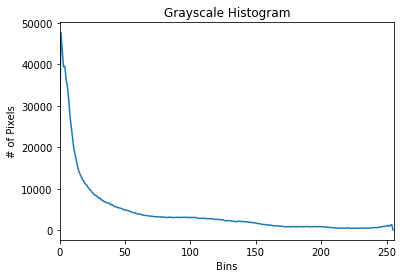

In [40]:
# Load image
image = cv2.imread("img/andromeda_galaxy.jpg")

# Convert to grayscale
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Compute histogram using 256 bins
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

# Plot histogram using matplotlib
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

The histogram tells use that the majority of the pixels are roughly 0 to 25, with very few pixels having a value greater than 100, meaning that the image is mostly composed of dark pixels. 

### Color histograms

Let's move on to computing a histogram for each channel of the image:

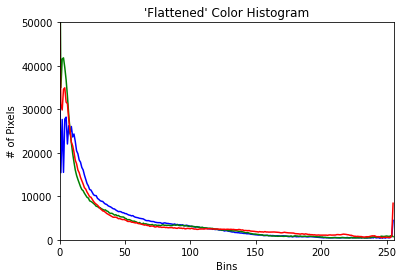

In [41]:
# Load image
image = cv2.imread("img/andromeda_galaxy.jpg")

# Split the channel
channels = cv2.split(image)

# Generate figure
colors = ('b', 'g', 'r')
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.ylim([0, 5e4]) # Limit y for better plot, hand-coded

# Process all three channels
for chan, color in zip(channels, colors):
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])

The first thing we do is split the image into three channels, then we loop over the color and compute a histogram for each. We can now move on to multi-dimensional histograms. For example, we can ask the question "How many pixels have a Red value of 10 and a Blue value of 30? Here's some code to do so:

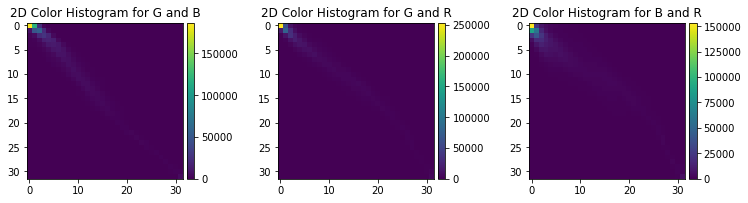

In [42]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Create figure
fig = plt.figure(figsize=(12,8))

# Add new subplot and calculate histogram for G and B
ax = fig.add_subplot(131)
hist = cv2.calcHist([channels[1], channels[0]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Color Histogram for G and B")

# Some extra code to display color bar better (same size as plot axes)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(p, cax=cax)

# Add new subplot and calculate histogram for G and R
ax = fig.add_subplot(132)
hist = cv2.calcHist([channels[1], channels[2]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Color Histogram for G and R")

# Some extra code to display color bar better (same size as plot axes)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(p, cax=cax)

# Add new subplot and calculate histogram for B and R
ax = fig.add_subplot(133)
hist = cv2.calcHist([channels[0], channels[2]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Color Histogram for B and R")

# Some extra code to display color bar better (same size as plot axes)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(p, cax=cax)

# Space out subplots
fig.subplots_adjust(wspace=0.5)

Yes, this is a fair amount of code, but that's down to two reasons: First, we are computing 2D histograms for each combination of RGB channels, and secondly, we want to plots to look nice in this Jupyter notebook, so there is some additional code to do so. The most important takeaway from this code can be seen by inspecting the first arguments to the `cv2.calcHist` function. Here we are passing in a list of channels. You can also account for all three RGB channels by building a 3D histogram.

### Histogram Equilization

Histogram equalization improces the contrast of an image by "stretching" the distribution of pixels. Consider a histogram with a large peak at the center of it. Applying histogram equalization will stretch the peak out towards the corner of the image, thus improving the global contrast of the image. Histogram equalization is applied to grayscale images. 

This method is useful when an image conatins foregrounds and backgrounds that are both dark or light. It tend to produce unrealistic effects in photographs, however, it is normally useful when enhancng the contrast of medical or satellite images. 

Histogram equalization can be performed by using the `cv2.equalizeHist` function, which accepts a single parameter, the grayscale image. The code below applies histogram equalization on our galaxy image. Notice how the contrast of the image has been radically changed.

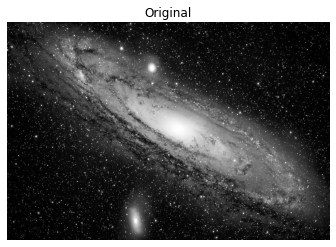

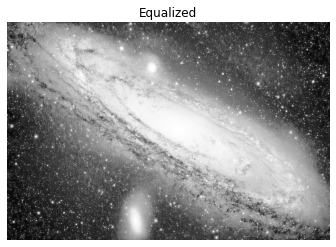

In [43]:
image = cv2.imread("img/andromeda_galaxy.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

eq = cv2.equalizeHist(image)

display(image, "Original")
display(eq, "Equalized")

### Histograms and Masks

We are now going to construct a mask and compute color histograms for the masked region only. First we need a convenience function to save us from writing repetetive lines of code (we've seen this code before when we plotted the color histograms)

In [44]:
import numpy as np

def plot_histogram(image, title, mask=None):
    chans = cv2.split(image)
    colors = ("b", "g", "r")
    
    plt.figure()
    plt.title(title)
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")

    for (chan, color) in zip(chans, colors):
        hist = cv2.calcHist([chan], [0], mask, [256], [0, 256])
        plt.plot(hist, color = color)
        plt.xlim([0, 256])

Now we're going to apply a maks to an image and compute the histogram

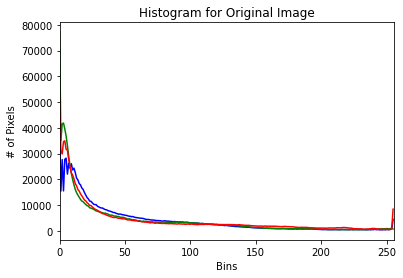

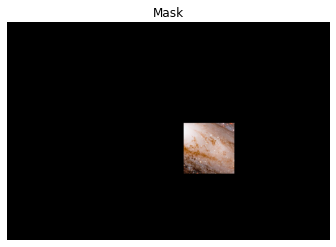

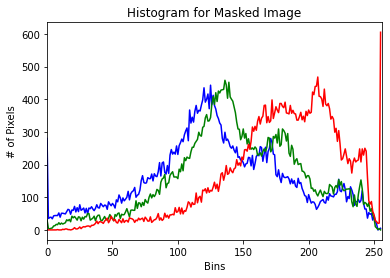

In [45]:
image = cv2.imread("img/andromeda_galaxy.jpg")
plot_histogram(image, "Histogram for Original Image")

mask = np.zeros(image.shape[:2], dtype=np.uint8)
mask = np.zeros(image.shape[:2], dtype=np.uint8)
cv2.rectangle(mask, (700, 400), (900, 600), 255, -1)

display(cv2.bitwise_and(image, image, mask=mask), "Mask")

plot_histogram(image, "Histogram for Masked Image", mask=mask)

Notice how dramatically different the masked histogram is to the unmasked histogram. By utilizing masks we are able to apply our computation only to the specific regions of the image that interests us.

## Smoothing and Blurring

<a id='blurring'></a>

Blurring is what happens when your camera takes a picture out of focus. Sharper regions in the image lose their detail, normally as a disc/circular shape. Practically, this means that each pixel in the image is mixed in with its surrounding pixel intensities. This "mixture" of pixels in a neeighborhood becomes a blurred pixel. While this effetc is usually unwanted in our photographs it is quite helpful when performing image processing tasks. Many image processing and computer vision functions, such as thresholding and edge detection, perform better if the image is first smoothed or blurred. 

### Averaging

The first blurring method we are going to explore is averaging. We define a *k* x *k* sliding window on top of our image, where *k* is always an odd number. This window is going to slide from left-to-right and from top-to-bottom. The pixel at the center of this matrix (we have to use odd numbers, otherwise there would not be a true "center") is then set to be the average of all other pixels surrounding it. 

We call this sliding a "convolutional kernel", or just "kernel". As the size of the kernel increases, the more blurred our image will become:

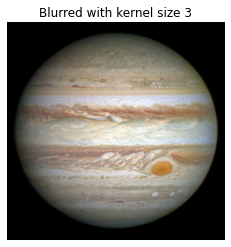

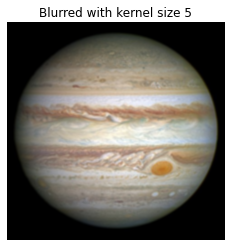

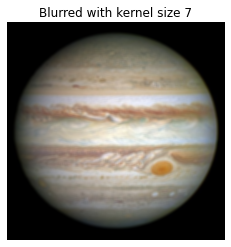

In [46]:
image = cv2.imread("img/jupiter.jpg")

display(cv2.blur(image, (3, 3)), "Blurred with kernel size 3")
display(cv2.blur(image, (5, 5)), "Blurred with kernel size 5")
display(cv2.blur(image, (7, 7)), "Blurred with kernel size 7")

In order to average blur an image we use the `cv2.blur` function. This function requires two arguments: the image we want to blur and the size of the kernel. In the above code we blur the image use three different kernel sizes. The larger the kernel becomes, the more blurred the images will be.

### Gaussian

Gaussian blurring is similar to average blurring, but instead of using a simple mean it uses a weighted mean, where neighborhood pixels that are closer to the central pixel contribute more "weight" to the average. The end result is that the image is less blurred, but more naturally blurred than using te average method

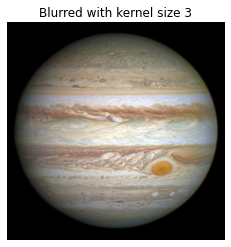

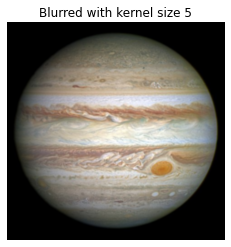

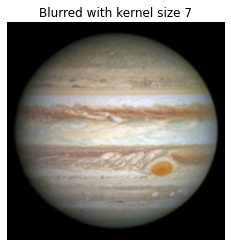

In [47]:
image = cv2.imread("img/jupiter.jpg")

display(cv2.GaussianBlur(image, (3, 3), 0), "Blurred with kernel size 3")
display(cv2.GaussianBlur(image, (5, 5), 0), "Blurred with kernel size 5")
display(cv2.GaussianBlur(image, (7, 7), 0), "Blurred with kernel size 7")

We use the `cv2.GaussianBlur` function, which takes a third argument, apart from the image and kernel size, the standard deviation $\sigma$ in the x-axis direction. By setting this value to 0 we are instructing OpenCV to automatically compute it based on our kernel size. The image shave less blur effect than when using the averaging method, however, the blur itself is more natural due to the computation of the weighted mean, rather than allowing all pixels in the kernel neighborhood to have equal weight.

### Median

Traditionally, the median blur method has been the most effective when removing salt-and-pepper noise. This type of noise is exactly what is sounds like: imagine taking a photograph, putting it on your dining room table, and sprinkling salt and pepper on top of it. Using the median blue method, you could remove the salt and pepper from your image.

When applying a median blur we first determine our kernel size $k$. Then, as in the averaging blurring method, we consider all pixels in the neighborhood of size *k* x *k*. But, unlike the averaging method, instead of replacing the central pixel with the average of the neighborhood, we instea replace the central pixel with the median of the neighborhood.

Median blurring is more effective at removing salt-and-pepper style noise from an image because each central pixel is always replaced with a pixel instensity that exists in the image. Averaging and Gaussian methods can compute means or weighted means for the neighborhood - this average pixel instensity may or may not be in the neighborhood. But by definition, the median pixel must exist in out neighborhood. By replacing our cetnral pixel with a median rather than an average, we can substantially reduce noise.

To perform median blurring we use the `cv2.medianBlur` function, which has the same signature as `cv2.blur`, except that only one value is required for the kernel size. Notice how we no longer get a "motion blur" effect like in averaging and Gaussian blurring - instead, we are removing details and noise.

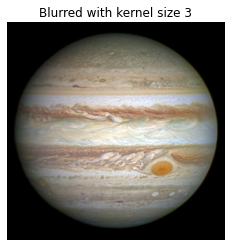

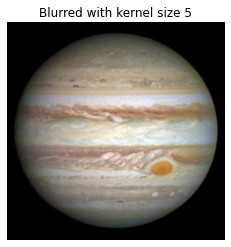

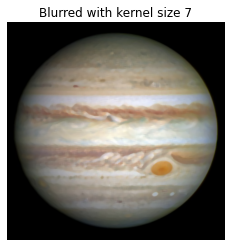

In [48]:
image = cv2.imread("img/jupiter.jpg")

display(cv2.medianBlur(image, 3), "Blurred with kernel size 3")
display(cv2.medianBlur(image, 5), "Blurred with kernel size 5")
display(cv2.medianBlur(image, 7), "Blurred with kernel size 7")

### Bilateral

Thus far, the intention of our blurring methods has been to reduce noise and detail in an image, however, we tend to lose edges in the image. In order to reduce nose while still maintaining edges we ca use bilateral blurrinng, which accomplishes this by introducing two Gaussian distributions. The first Gaussian functiono only considers spatial neighbors, pixel that appear close together in the *(x, y)* coordinate space of the image. The second Guassian, then, models the pixel inensity of the neighborhood, ensuring that only pixels with similar intensity are included in the actual computation of the blur.

Overall, this method is able to preserve edges of an image, while still reducing noise. The largest downside to this method is that is is considerably slower than it counterparts.

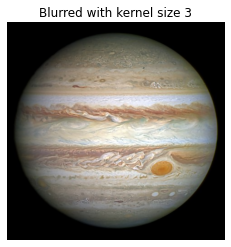

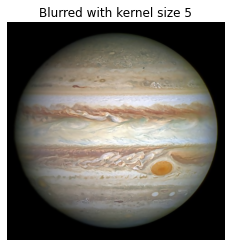

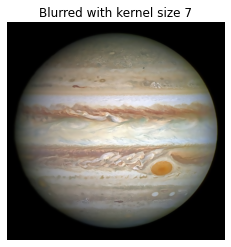

In [49]:
image = cv2.imread("img/jupiter.jpg")

display(cv2.bilateralFilter(image, 5, 21, 21), "Blurred with kernel size 3")
display(cv2.bilateralFilter(image, 7, 31, 31), "Blurred with kernel size 5")
display(cv2.bilateralFilter(image, 9, 41, 41), "Blurred with kernel size 7")

We apply bilateral blurring by calling the `cv2.bilateralFilter` function. The first parameters is the image we want to blur. Then, we need to define the diameter of our pixel neighborhood. The third argument is our color $\sigma$. A larger value for color $\sigma$ means that more colors in the neighborhood will be considered when computing the blur. Finally, we need to supply the space $\sigma$. A larger value of space $\sigma$ means that pixels farther out from the central pixel will influence the blurring calculation, provided that their colors are similar enough. As the size of the parameters increases, our image has noise remove, yet the edges remain.

## Thresholding

<a id='thresholding'></a>

Thresholding is the binarization of an image. In general, we seek to convert a grayscale image to a binary image, where the pixels are either 0 or 255. A simple thresholding example would be selecting a pixel value *p*, and then setting all pixel intensities less than *p* to zero, and all pixel values greater to *p* to 255. In this way, we are able to create a binary representation of the image.

Normally, we use thresholding to focus on objects or areas of particular interest in an image. In this section we'll use a photo of a cluster of galaxies and try to find the galaxies within the photo.

### Simple Thresholding

Applying simple thresholding methods requires human intervention. We must specify a threshold value *T*. All pixel intensities below *T* are set to 0, with all other pixels set to 255.

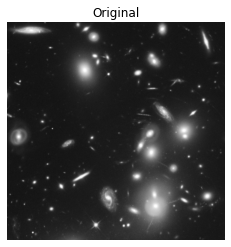

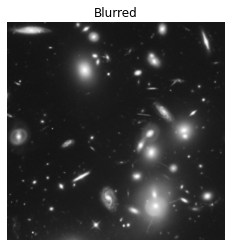

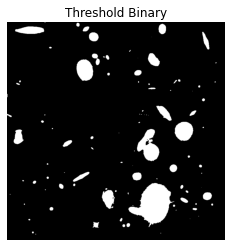

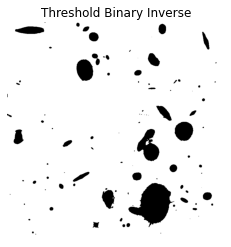

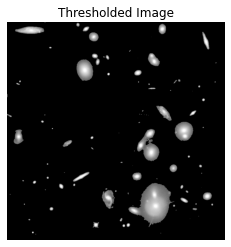

In [50]:
# Load image and convert to grayscale
image = cv2.imread("img/galaxies.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
display(image, "Original")

# Blur image using Gaussian blurring with a kernel size of 5
blurred = cv2.GaussianBlur(image, (5, 5), 0)
display(blurred, "Blurred")

# Perform thresholding at value 155
(T, thresh) = cv2.threshold(blurred, 100, 255, cv2.THRESH_BINARY)
display(thresh, "Threshold Binary")

(T, thresh_inv) = cv2.threshold(blurred, 100, 255, cv2.THRESH_BINARY_INV)
display(thresh_inv, "Threshold Binary Inverse")

# Use threshold as mask on original image
thresh_image = cv2.bitwise_and(image, image, mask=thresh)
display(thresh_image, "Thresholded Image")

First we load the imagem then apply Gaussian blurring with a $\sigma$ = 5 radius. Applying Gaussian blurring helps remove some of the noise in the image that we are not concerned with. Then we compute the thresholded image using the `cv2.threshold` function. This method requires four arguments. The first is the grayscale image, followed by the manually set treshold value *T*, which we set to 100. The third argument is the maximum value applied during thresholding. Any pixel intensity that is greater than *T* is set to this value. Finally, we must provide a thresholding method. We use the `cv2.THRESH_BINARY` method, which indicates that pixel values *p* greater than *T* are set to the maximum value (third argument).

The `cv2.threshold` function returns two values. The first is *T*, the value we manually specified for thresholding. The second is our actual thresholded image.

We then display the thresholded image. We can see that the galaxies are now black pixels and the white pixels are the background. We then apply inverse  thresholding by using `cv2.THRESH_BINARY` as our thresholding method, which results in the galaxies being white and the background black. 

Finally, we reveal the galaxies in the image and hide everything else. We use the returned thresholded image as a mask and use the `cv2.bitwise_and` function to apply it. 

### Adaptive Thresholding

One of the downsides of using simple thresholding methods is that we need to manually suply our threshold value *T*. Not only does finding a good *T* value required a lot of manual experiments and parameter tuning, it's not very helpful if the image exhibits a lot of range in pixel intensities. Having just one value of *T* might not suffice.

In order to overcome this problem, we can use adaptive thresholding, which considers small neighbors of pixels and then finds an optimal threshold value for each neighbor. This method allows us to handle cases where there may be dramatic ranges of pixel intensities and the optimal value of *T* may change for different parts of the image.

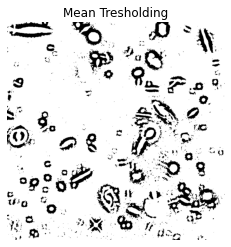

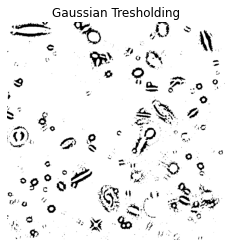

In [51]:
# Load image, convert to grayscale and blur
image = cv2.imread("img/galaxies.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Adaptive thresholding with mean
thresh = cv2.adaptiveThreshold(blurred, 255,
                              cv2.ADAPTIVE_THRESH_MEAN_C,
                              cv2.THRESH_BINARY, 
                              21, 4)
display(thresh, "Mean Tresholding")

# Adaptive thresholding with gaussian
thresh = cv2.adaptiveThreshold(blurred, 255,
                              cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                              cv2.THRESH_BINARY, 
                              25, 4)
display(thresh, "Gaussian Tresholding")

We apply adaptive thresholding to our blurred image using the `cv2.adaptiveThreshold` function. The first parameters we supply is the image, followed by our maximum value of 255. The third argument is our method to compute the threshold for the current neighborhood of pixels. By supplying `cv2.ADAPTIVE_THRESH_MEAN_C` we indicate that we want to compute the mean of the neighborhood of pixels and treat it as our *T* value.

Next we need our thresholding method, similar to simple thresholding. The next parmeter is our neighborhood size. The integer value must be odd and indicates how large our neighborhood of pixels is going to be. Finally we supply a parameter simple called *C*. This value is an integer that is subtracted from the mean, allowing us to fine-tune our thresholding. 

Besides applying standard mean thresholding, we can also supply Gaussian (weighted mean) thresholding by using `cv2.ADAPTIVE_ThreSH_GAUSSIAN_C`, and tuning a few of the values. In general, choosing between mean and Gaussian adaptive thresholding requires a few experiments. The most important parameters to vary are the neighborhood size and *C*. 

### Otsu

Otsu's method assumes there are two peaks in the grayscale histogram of the image. It then tries to find an optimal value to separate these two peaks, the value *T*. 

Otsu calculated a threshold of 86.0


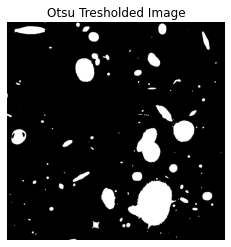

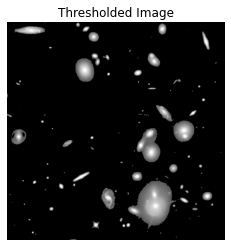

In [52]:
# Load image, convert to grayscale and blur
image = cv2.imread("img/galaxies.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Apply Otsu thresholding
T, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
print(f"Otsu calculated a threshold of {T}")
display(thresh, "Otsu Tresholded Image")

# Generate thresholded image
thresh_image = cv2.bitwise_and(image, image, mask=thresh)
display(thresh_image, "Thresholded Image")

To compute the optimal value of *T* we use `cv2.threshold` and instruct it to use the `cv2.THRESH_OTSU` method. The expression `cv2.THRESH_BINARY | cv2.THRESH_OTSU` means that we actually using two method: Otsu thresholding and binarization (this way of expressing this is a relic form the C++ implementation of OpenCV). Otsu determines that the optimal threshold is 87. 

## Gradients and Edge Detection

<a id='edge_detection'></a>

Formally, edge detection embodies mathematical methods to find points in an image where the brightness of pixel intesities changes distinctly. The first thing we are going to do is find the "gradient" of the grayscale image, allowing us to find edge-like regions in the *x* and *y* direction.

We'll then apply Canny edge detection, a multi-stage process of noise reduction (blurring), finding the gradient of the image (utilizing the Sobel kernel in both horizontal and vertical direction), non-maximum suppression, and hysteresis thresholding. If that sounds like a mouthfull, it's because it is. We won't jump too far into the details, however you are encouraged to read up on the algorithms. Overall, they are not complicated and can be insightful to the behind-the-scenes action of OpenCV

### Laplacian and Sobel

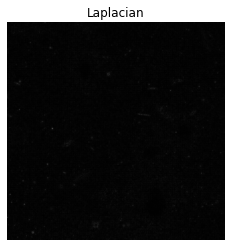

In [53]:
image = cv2.imread("img/galaxies.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

lap = cv2.Laplacian(image, cv2.CV_64F)
lap = np.uint8(np.absolute(lap))
display(lap, "Laplacian")

Here we use the Laplacian to compute the gradient magnitude image by calling `cv2.Laplacian` function. The first argument is our grayscale image, while the second argument is our data type for the output image, in this case 64-bit float. The reason for this is the transition from black-to-white to white-to-black in the image. Transitioning from black-to-white is considered a positive slope, whereas a transition from white-to-black is a negative slope. 8-bit unsigned integer does not represent negative values, so we use 64-bit instead

In order to ensure you catch all the edges, use a floating point data type, then take the absolute value of the gradient image and convert it back to an 8-bit unsigned integer. Take note of this, as otherwise you'll be missing edges in your image.

Let's move on to computing the Sobel gradient representation:

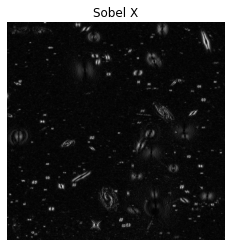

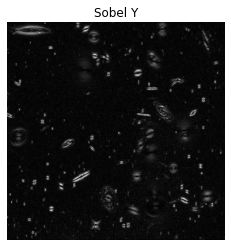

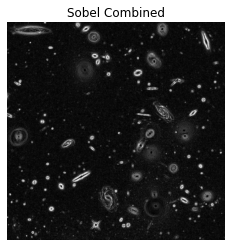

In [54]:
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1)

sobel_x = np.uint8(np.absolute(sobel_x))
sobel_y = np.uint8(np.absolute(sobel_y))

sobel_combined = cv2.bitwise_or(sobel_x, sobel_y)

display(sobel_x, "Sobel X")
display(sobel_y, "Sobel Y")
display(sobel_combined, "Sobel Combined")

Using the Sobel operator, we can compute gradient magnitude representations along the *x* and *y* axis, allowing us to find both horizontal and vertical edge-like regions. The first argument to `cv2.Sobel` is the image, then the data type. The last two arguments are the order of the derivatives in the *x* and *y* directions, respectively. Specify a value of 1 and 0 to find vertical edge-like regions, and 0 and 1 to find horizontal ones. If we combine the gradient images we can apply a bitwise OR. 

One thing you'll notice from the combined gradient image is that the edges are very "noisy". They are not clean and crisp. We can remedy that by using the Canny edge detector

### Canny Edge Detector

The Canny edge detector is a multi-step process. It involves blurring the image to remove noise, computing Sobel gradient images in the *x* and *y* direction, suppressing edges, and finally a hysteresis thresholding stage that determines if a pixel is "edge-like" or not.

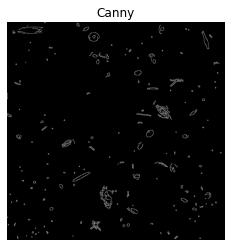

In [55]:
canny = cv2.Canny(image, 30, 150)
display(canny, "Canny")

We apply the canny edge detector by using the `cv2.Canny` function. The first argument is our image, then we need two values: `threshold1` and `threshold2`. Any gradient larger than `threshold2` is considered to be an edge. Values in between `threshold1` and `threshold2` are either classified as edges or non-edges based on how their intersections are "connected". In this case, any gradient below 30 are considered non-edges whereas any values above 150 are considered edges.

Notice how the edges are more "crips". We have substantially less noise than when we used the Laplacian or Sobel gradient images.

## Contours

<a id='contours'></a>

We have just explored how to detect edges, now we are going to use these edges to help us find the actual objects in the image and count them. We'll be using a photo of a starfield OpenCV provides functions to find "curves" in an image, called contours. A contour is a curve of points, with no gap in the curve. Contours are extremely useful for such things as shape approximation and analysis.

In order to find contours in an imge, you need to first obtain binarization of the image, using either edge detection methods or thresholding. We'll be using the Canny edge detector here. 

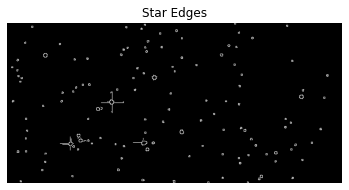

I count 135 stars in the image


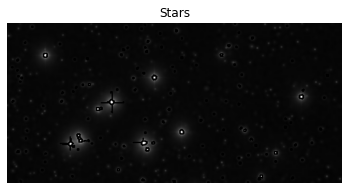

In [56]:
### Load image, turn to grayscale and blur
image = cv2.imread("img/stars.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Perform edge detection
edged = cv2.Canny(blurred, 20, 200)
display(edged, "Star Edges")

# Find contours
contours, _ = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(f"I count {len(contours)} stars in the image")

# Draw detected contours on the image
stars = blurred.copy()
cv2.drawContours(stars, contours, -1, (0, 255, 0), 2)

# Show galaxies
display(stars, "Stars")

First we load the image, convert to grayscale, blur it and apply the Canny edge detector. Once we have the outlines of the stars, we can find the contours using the `cv2.findContours` function. This method returns 2 things: the contours and the hierarchy of the contours.

*Note: The return tuple of `cv2.findContours` has changed in OpenCV 3.0 with respect to OpenCV 2.4.X. We are using the latter version in this example. The new OpenCV returns 3 items, the above two as well as the image itself after applying the contour detection algorithm, such that our return expression above would be: `_, contours, _ = cv2.find...`. Take note of the OpenCV version you have installed when using this function*

The first argument to `cv2.findContours` is the edged image. Note that this function is destructive to the image you pass in. If you intend to use that image later on in your code, it's best to make a copy of it, as we do here. The second argument is the type of contours we want. We use `cv2.RETR_EXTERNAL` to retrieve only the outermost contours (the contours that follow the external outline of an object). We can also pass in `cv2.RETR_LIST` to grabb *all* contours. Other methods include hierarchical contours using `cv2.RETR_COMP` and `cv2.RETR_TREE`. The last argument is how we want to approximate the contour. We use `cv2.CHAIN_APPROX_SIMPLE` to compress horizontal, vertical and diagonal segments into their end-points onlu. This saves both computation and memory. If we wanted all points along the contour, without compression, we can pass in `cv2.CHAIN_APPROX_NONE`; however, be vary sparing when using this function. Retrieveing all points along a contour is often unnecessary and wasteful of resources.

Our contours `contours` is simply a Python list. We can use the `len` function on it to count the number of contours that were returned. Finally, we are able to draw the contours. First we make a copy of the original iage, then call `cv2.drawContours` to draw the actual contours on our image. The first argument is the image we want to draw on, following by the list of contours. The third argument is the contour index. By specifying a negative value of -1, we are indicating that we want to draw all the contours. However, we could also supply an index *i*, which would be the *i*th contour in `contours`. This would allow us to draw only a single contour rather than all of them. The fourth argument is the color of the line, and finally the last argumet is the thickness of the line.